# T-Money taxi 수요 LinearRegression 예측   
__2020.04.28__  
__유휘근__  

  
LinearRegression을 이용하여 선릉역 반경 150m에서 2018.10 ~ 2019.03까지의 시간대(1h 단위) 택시 승차 데이터로 수요 예측하기
1. 방법론 : __Regression (회귀) - 수치예측__ 
2. 방법론에 사용할 알고리즘 및 라이브러리 : __LinearRegression(선형회귀) Python scikit-learn의 LinearRegression__
3. 알고리즘에 사용되는 파라미터 : __입력 파라미터는 따로 없으며 모델생성에 사용되는 독립변수들을 입력해준다.__
4. 평가방법   
__- MSE(Mean Squared Error) : 실제값과 예측값의 차이를 제곱해 평균한 것.__  
__- RMSE(Root Mean Squared Error) : MSE에 루트를 씌운 것.__ 


## 모듈 import

In [13]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.font_manager as fm
from matplotlib import rc

# 시각화 그래프 '-' & 한글 깨짐 현상 처리
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc

mpl.rcParams['axes.unicode_minus'] = False
font_name = fm.FontProperties(fname='c:\\windows\\fonts\\malgun.ttf').get_name()
rc('font', family=font_name)

## 데이터 준비

### 데이터 로드

In [14]:
taxi = pd.read_csv('data/T-Money/seolleung_dataset.csv')
taxi

,o_time,yesterday,today,tomorrow,temp,windspeed,humidity,cloud,precipitation,snowcover,visibility,user,count
0,2018-10-01 00:00:00,1,0,0,14.1,2.6,55,0.0,0.0,0.0,2000,1.0,52
1,2018-10-01 01:00:00,1,0,0,13.9,2.0,57,2.0,0.0,0.0,2000,1.0,17
2,2018-10-01 02:00:00,1,0,0,13.9,2.4,56,4.0,0.0,0.0,2000,1.0,10
3,2018-10-01 03:00:00,1,0,0,13.6,1.6,56,8.0,0.0,0.0,2000,1.0,13
4,2018-10-01 04:00:00,1,0,0,13.7,1.9,56,10.0,0.0,0.0,2000,1.0,12
5,2018-10-01 05:00:00,1,0,0,13.7,1.8,57,8.0,0.0,0.0,1999,1.0,8
6,2018-10-01 06:00:00,1,0,0,13.3,2.3,56,7.0,0.0,0.0,2000,1.0,14
7,2018-10-01 07:00:00,1,0,0,13.1,2.1,58,3.0,0.0,0.0,1997,1.0,31
8,2018-10-01 08:00:00,1,0,0,13.7,2.4,54,7.0,0.0,0.0,1960,1.0,148
9,2018-10-01 09:00:00,1,0,0,14.9,3.4,50,1.0,0.0,0.0,1989,1.0,130


### 시간 변수 추가

In [15]:
# 시간 변수 추가를 위해 o_time 컬럼 데이터타입 문자열에서 datetime 으로 변경
taxi['o_time'] = taxi.o_time.apply(pd.to_datetime)
#taxi['o_time'] = pd.to_datetime(taxi['o_time'],format='%Y-%m-%d %H:%M:%S')

# datetime 타입에서 년,월,일,시간 추출
#taxi['year'] = taxi['o_time'].dt.year
#taxi['month'] = taxi['o_time'].dt.month
#taxi['day'] = taxi['o_time'].dt.day
taxi['hour'] = taxi['o_time'].dt.hour
taxi

,o_time,yesterday,today,tomorrow,temp,windspeed,humidity,cloud,precipitation,snowcover,visibility,user,count,hour
0,2018-10-01 00:00:00,1,0,0,14.1,2.6,55,0.0,0.0,0.0,2000,1.0,52,0
1,2018-10-01 01:00:00,1,0,0,13.9,2.0,57,2.0,0.0,0.0,2000,1.0,17,1
2,2018-10-01 02:00:00,1,0,0,13.9,2.4,56,4.0,0.0,0.0,2000,1.0,10,2
3,2018-10-01 03:00:00,1,0,0,13.6,1.6,56,8.0,0.0,0.0,2000,1.0,13,3
4,2018-10-01 04:00:00,1,0,0,13.7,1.9,56,10.0,0.0,0.0,2000,1.0,12,4
5,2018-10-01 05:00:00,1,0,0,13.7,1.8,57,8.0,0.0,0.0,1999,1.0,8,5
6,2018-10-01 06:00:00,1,0,0,13.3,2.3,56,7.0,0.0,0.0,2000,1.0,14,6
7,2018-10-01 07:00:00,1,0,0,13.1,2.1,58,3.0,0.0,0.0,1997,1.0,31,7
8,2018-10-01 08:00:00,1,0,0,13.7,2.4,54,7.0,0.0,0.0,1960,1.0,148,8
9,2018-10-01 09:00:00,1,0,0,14.9,3.4,50,1.0,0.0,0.0,1989,1.0,130,9


### o_time 컬럼 제거

In [16]:
pre = taxi.drop(['o_time'],axis=1, inplace=False)
pre

,yesterday,today,tomorrow,temp,windspeed,humidity,cloud,precipitation,snowcover,visibility,user,count,hour
0,1,0,0,14.1,2.6,55,0.0,0.0,0.0,2000,1.0,52,0
1,1,0,0,13.9,2.0,57,2.0,0.0,0.0,2000,1.0,17,1
2,1,0,0,13.9,2.4,56,4.0,0.0,0.0,2000,1.0,10,2
3,1,0,0,13.6,1.6,56,8.0,0.0,0.0,2000,1.0,13,3
4,1,0,0,13.7,1.9,56,10.0,0.0,0.0,2000,1.0,12,4
5,1,0,0,13.7,1.8,57,8.0,0.0,0.0,1999,1.0,8,5
6,1,0,0,13.3,2.3,56,7.0,0.0,0.0,2000,1.0,14,6
7,1,0,0,13.1,2.1,58,3.0,0.0,0.0,1997,1.0,31,7
8,1,0,0,13.7,2.4,54,7.0,0.0,0.0,1960,1.0,148,8
9,1,0,0,14.9,3.4,50,1.0,0.0,0.0,1989,1.0,130,9


## 독립변수들과 종속변수와의 산점도와 회귀직선

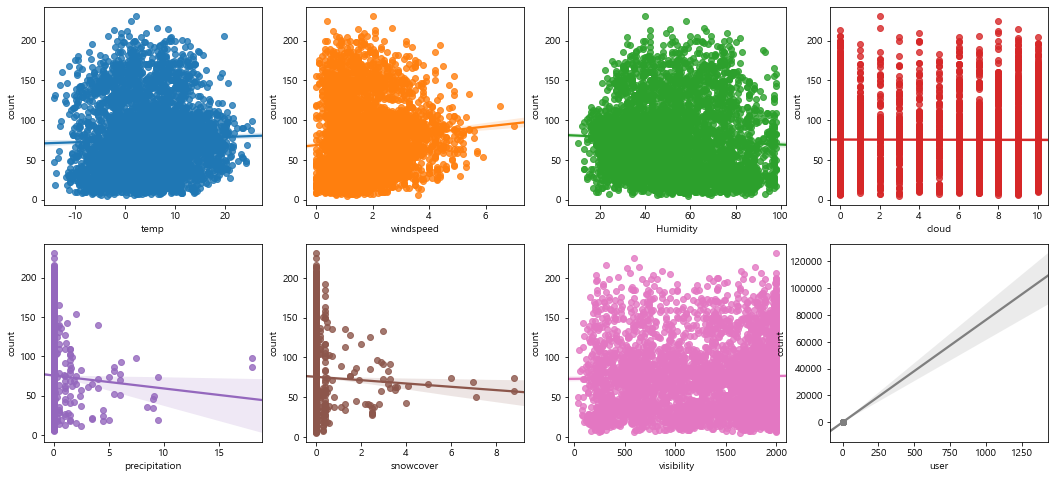

In [33]:
fig, axs = plt.subplots(figsize=(18,8), ncols=4, nrows=2)
lm_features = ['temp','windspeed','Humidity','cloud','precipitation','snowcover','visibility','user']
for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    sns.regplot(x=feature,y='count',data=taxi,ax=axs[row][col])

In [3]:
sns.corr(taxi)

NameError: name 'sns' is not defined

## 모델 생성

### train, test DataSet 분리

In [17]:
y_target = pre['count']
X_data = pre.drop(['count'], axis=1,inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=156)

In [99]:
X_train

,yesterday,today,tomorrow,temp,windspeed,humidity,cloud,precipitation,snowcover,visibility,user,year,month,day,hour
713,0,0,0,9.9,2.6,40,1.0,0.0,0.0,2000,1.00,2018,10,30,17
3756,0,0,0,10.5,2.9,50,9.0,0.0,0.0,235,1.00,2019,3,6,12
430,0,0,0,11.6,0.2,61,3.0,0.0,0.0,2000,0.79,2018,10,18,22
4247,0,0,0,10.1,1.1,40,0.0,0.0,0.0,1247,1.00,2019,3,26,23
4112,0,0,0,8.2,2.1,97,10.0,0.0,0.0,142,1.00,2019,3,21,8
1388,0,0,0,8.3,1.6,39,0.0,0.0,0.0,560,1.00,2018,11,27,20
1603,0,0,0,4.0,3.4,39,10.0,0.0,0.0,1905,1.00,2018,12,6,19
4303,0,0,1,5.6,1.1,35,8.0,0.0,0.0,2000,1.00,2019,3,29,7
1271,0,0,0,0.4,2.9,37,0.0,0.0,0.0,2000,0.96,2018,11,22,23
925,0,0,0,11.5,2.1,95,10.0,0.0,0.0,457,1.00,2018,11,8,13


### 선형회귀모델 생성

In [18]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [19]:
print('절편 값 :',lr.intercept_)
print('회귀 계수 값 :',np.round(lr.coef_,1))

절편 값 : -36.99001548000409
회귀 계수 값 : [-1.980e+01 -2.860e+01  4.200e+00 -1.000e-01 -5.000e-01 -0.000e+00
 -1.000e-01 -1.700e+00  9.000e-01 -0.000e+00  1.165e+02  1.400e+00]


In [20]:
coeff = pd.Series(data=np.round(lr.coef_,1),index=X_data.columns)
coeff.sort_values(ascending=False)

user             116.5
tomorrow           4.2
hour               1.4
snowcover          0.9
visibility        -0.0
humidity          -0.0
cloud             -0.1
temp              -0.1
windspeed         -0.5
precipitation     -1.7
yesterday        -19.8
today            -28.6
dtype: float64

## 예측

In [21]:
y_preds = lr.predict(X_test)
y_preds

array([ 52.57222342,  89.83724476, 112.05285136, ..., 104.82234779,
        99.67525576,  33.33510956])

## 평가

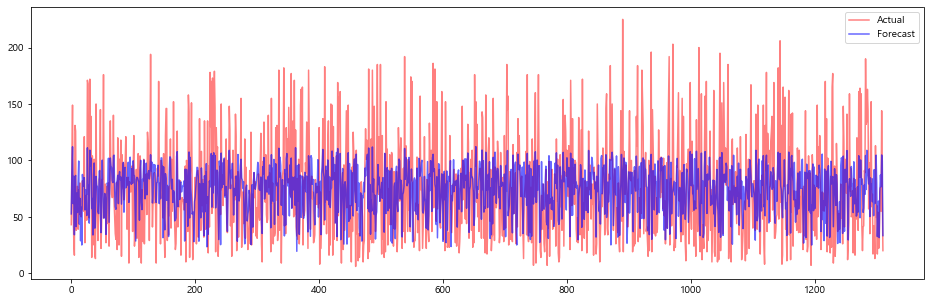

In [41]:
plt.figure(figsize=(16,5))
plt.plot(y_test.values,'-r' ,alpha=0.5)
plt.plot(y_preds,'-b',alpha=0.6)
plt.legend(['Actual','Forecast'])
plt.show()

In [23]:
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)
print('MSE : {0:.3f}, RMSE : {1:.3F}'.format(mse,rmse))
print('Variance score : {0:3f}'.format(r2_score(y_test,y_preds)))

MSE : 1462.469, RMSE : 38.242
Variance score : 0.223916


## 전체 데이터 예측 확인

### 전체데이터

In [24]:
pre

,yesterday,today,tomorrow,temp,windspeed,humidity,cloud,precipitation,snowcover,visibility,user,count,hour
0,1,0,0,14.1,2.6,55,0.0,0.0,0.0,2000,1.0,52,0
1,1,0,0,13.9,2.0,57,2.0,0.0,0.0,2000,1.0,17,1
2,1,0,0,13.9,2.4,56,4.0,0.0,0.0,2000,1.0,10,2
3,1,0,0,13.6,1.6,56,8.0,0.0,0.0,2000,1.0,13,3
4,1,0,0,13.7,1.9,56,10.0,0.0,0.0,2000,1.0,12,4
5,1,0,0,13.7,1.8,57,8.0,0.0,0.0,1999,1.0,8,5
6,1,0,0,13.3,2.3,56,7.0,0.0,0.0,2000,1.0,14,6
7,1,0,0,13.1,2.1,58,3.0,0.0,0.0,1997,1.0,31,7
8,1,0,0,13.7,2.4,54,7.0,0.0,0.0,1960,1.0,148,8
9,1,0,0,14.9,3.4,50,1.0,0.0,0.0,1989,1.0,130,9


### 전체데이터 count값 추출

In [25]:
t1_target = pre['count']
t1_target

0        52
1        17
2        10
3        13
4        12
5         8
6        14
7        31
8       148
9       130
10       94
11       89
12      107
13       95
14       82
15       97
16       88
17       80
18       75
19       88
20      112
21      120
22      170
23      147
24      193
25      100
26       53
27       33
28       37
29       31
       ... 
4338     54
4339     42
4340     61
4341     46
4342     57
4343     55
4344     81
4345     69
4346     50
4347     41
4348     31
4349     40
4350     18
4351     14
4352     26
4353     39
4354     37
4355     23
4356     35
4357     45
4358     45
4359     39
4360     33
4361     31
4362     40
4363     25
4364     38
4365     37
4366     35
4367     50
Name: count, Length: 4368, dtype: int64

### 예측하기 위해 target(count) 컬럼 제거

In [26]:
taxi1 = pre
taxi1.drop(['count'],axis=1,inplace=True)
taxi1

,yesterday,today,tomorrow,temp,windspeed,humidity,cloud,precipitation,snowcover,visibility,user,hour
0,1,0,0,14.1,2.6,55,0.0,0.0,0.0,2000,1.0,0
1,1,0,0,13.9,2.0,57,2.0,0.0,0.0,2000,1.0,1
2,1,0,0,13.9,2.4,56,4.0,0.0,0.0,2000,1.0,2
3,1,0,0,13.6,1.6,56,8.0,0.0,0.0,2000,1.0,3
4,1,0,0,13.7,1.9,56,10.0,0.0,0.0,2000,1.0,4
5,1,0,0,13.7,1.8,57,8.0,0.0,0.0,1999,1.0,5
6,1,0,0,13.3,2.3,56,7.0,0.0,0.0,2000,1.0,6
7,1,0,0,13.1,2.1,58,3.0,0.0,0.0,1997,1.0,7
8,1,0,0,13.7,2.4,54,7.0,0.0,0.0,1960,1.0,8
9,1,0,0,14.9,3.4,50,1.0,0.0,0.0,1989,1.0,9


### 예측

In [27]:
t1 = lr.predict(taxi1)
t1

array([51.52241641, 52.9980147 , 54.074797  , ..., 54.99231102,
       56.49514137, 58.4695729 ])

### 모델 평가

In [122]:
mse = mean_squared_error(t1_target, t1)
rmse = np.sqrt(mse)
print('MSE : {0:.3f}, RMSE : {1:.3F}'.format(mse,rmse))
print('Variance score : {0:3f}'.format(r2_score(y_test,y_preds)))

MSE : 1526.188, RMSE : 39.066
Variance score : 0.225948


### 실제값과 예측값 비교

#### 실제데이터에 예측값 컬럼 추가

In [28]:
taxi.set_index('o_time',inplace=True)
taxi

,yesterday,today,tomorrow,temp,windspeed,humidity,cloud,precipitation,snowcover,visibility,user,count,hour
o_time,,,,,,,,,,,,,
2018-10-01 00:00:00,1,0,0,14.1,2.6,55,0.0,0.0,0.0,2000,1.0,52,0
2018-10-01 01:00:00,1,0,0,13.9,2.0,57,2.0,0.0,0.0,2000,1.0,17,1
2018-10-01 02:00:00,1,0,0,13.9,2.4,56,4.0,0.0,0.0,2000,1.0,10,2
2018-10-01 03:00:00,1,0,0,13.6,1.6,56,8.0,0.0,0.0,2000,1.0,13,3
2018-10-01 04:00:00,1,0,0,13.7,1.9,56,10.0,0.0,0.0,2000,1.0,12,4
2018-10-01 05:00:00,1,0,0,13.7,1.8,57,8.0,0.0,0.0,1999,1.0,8,5
2018-10-01 06:00:00,1,0,0,13.3,2.3,56,7.0,0.0,0.0,2000,1.0,14,6
2018-10-01 07:00:00,1,0,0,13.1,2.1,58,3.0,0.0,0.0,1997,1.0,31,7
2018-10-01 08:00:00,1,0,0,13.7,2.4,54,7.0,0.0,0.0,1960,1.0,148,8


In [29]:
taxi['pred'] = t1
taxi

,yesterday,today,tomorrow,temp,windspeed,humidity,cloud,precipitation,snowcover,visibility,user,count,hour,pred
o_time,,,,,,,,,,,,,,
2018-10-01 00:00:00,1,0,0,14.1,2.6,55,0.0,0.0,0.0,2000,1.0,52,0,51.522416
2018-10-01 01:00:00,1,0,0,13.9,2.0,57,2.0,0.0,0.0,2000,1.0,17,1,52.998015
2018-10-01 02:00:00,1,0,0,13.9,2.4,56,4.0,0.0,0.0,2000,1.0,10,2,54.074797
2018-10-01 03:00:00,1,0,0,13.6,1.6,56,8.0,0.0,0.0,2000,1.0,13,3,55.550636
2018-10-01 04:00:00,1,0,0,13.7,1.9,56,10.0,0.0,0.0,2000,1.0,12,4,56.626871
2018-10-01 05:00:00,1,0,0,13.7,1.8,57,8.0,0.0,0.0,1999,1.0,8,5,58.282352
2018-10-01 06:00:00,1,0,0,13.3,2.3,56,7.0,0.0,0.0,2000,1.0,14,6,59.637560
2018-10-01 07:00:00,1,0,0,13.1,2.1,58,3.0,0.0,0.0,1997,1.0,31,7,61.519779
2018-10-01 08:00:00,1,0,0,13.7,2.4,54,7.0,0.0,0.0,1960,1.0,148,8,62.605811


#### 실제값, 예측값 비교 Graph

##### 18-10-01 ~ 19-03-01 전체 확인

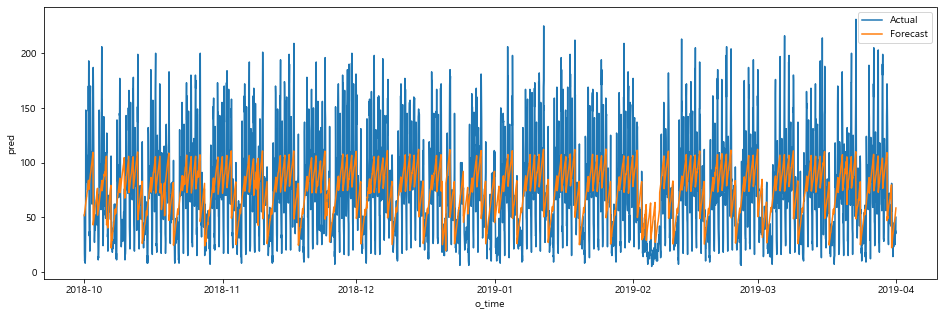

In [38]:
plt.figure(figsize=(16,5))
sns.lineplot(x=taxi.index,y='count',data=taxi)
sns.lineplot(x=taxi.index,y='pred',data=taxi)
plt.legend(['Actual','Forecast'])
plt.show()

##### 2018-10 한달 확인

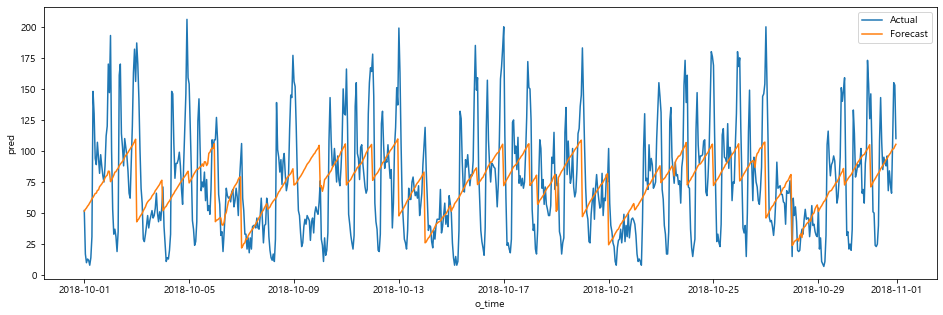

In [37]:
plt.figure(figsize=(16,5))
sns.lineplot(x=taxi['2018-10'].index,y='count',data=taxi['2018-10'])
sns.lineplot(x=taxi['2018-10'].index,y='pred',data=taxi['2018-10'])
plt.legend(['Actual','Forecast'])
plt.show()

##### 2018-10-05 ~ 2018-10-12 일주일 확인

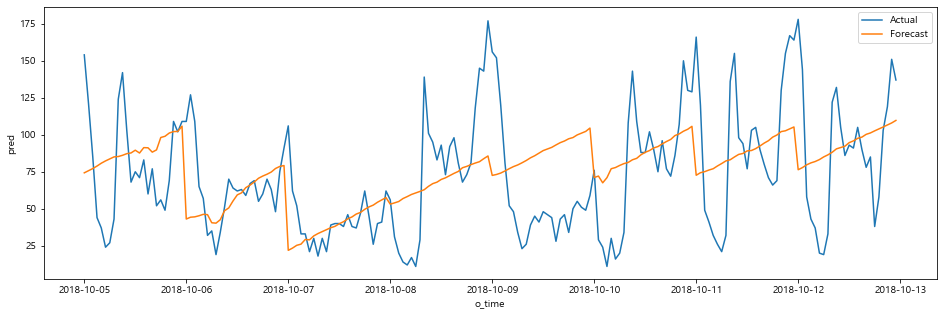

In [36]:
plt.figure(figsize=(16,5))
sns.lineplot(x=taxi['2018-10-05':'2018-10-12'].index,y='count',data=taxi['2018-10-05':'2018-10-12'])
sns.lineplot(x=taxi['2018-10-05':'2018-10-12'].index,y='pred',data=taxi['2018-10-05':'2018-10-12'])
plt.legend(['Actual','Forecast'])
plt.show()